# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.218217373 W= 0.459695 b= -0.709991
Epoch: 0100 cost= 0.201900572 W= 0.4472 b= -0.620097
Epoch: 0150 cost= 0.187468007 W= 0.435447 b= -0.535551
Epoch: 0200 cost= 0.174702048 W= 0.424394 b= -0.456032
Epoch: 0250 cost= 0.163410440 W= 0.413997 b= -0.381243
Epoch: 0300 cost= 0.153422847 W= 0.40422 b= -0.310901
Epoch: 0350 cost= 0.144588724 W= 0.395023 b= -0.244744
Epoch: 0400 cost= 0.136774972 W= 0.386374 b= -0.18252
Epoch: 0450 cost= 0.129863739 W= 0.378239 b= -0.123998
Epoch: 0500 cost= 0.123750828 W= 0.370588 b= -0.0689566
Epoch: 0550 cost= 0.118344024 W= 0.363392 b= -0.0171884
Epoch: 0600 cost= 0.113561854 W= 0.356624 b= 0.0315009
Epoch: 0650 cost= 0.109332174 W= 0.350258 b= 0.0772944
Epoch: 0700 cost= 0.105591185 W= 0.344271 b= 0.120364
Epoch: 0750 cost= 0.102282412 W= 0.33864 b= 0.160873
Epoch: 0800 cost= 0.099356018 W= 0.333344 b= 0.198972
Epoch: 0850 cost= 0.096767806 W= 0.328363 b= 0.234805
Epoch: 0900 cost= 0.094478697 W= 0.323678 b= 0.268508
Epoch: 0950 cost= 

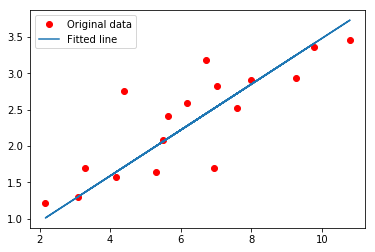

In [15]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [16]:
# Regression result